In [ ]:
#@title **Integrantes:** 
#@markdown Miguel Daniel Velandia Pinilla - 2182073 \
#@markdown Juan Sebastian Espinosa Espinosa - 2183184 \
#@markdown Juan Daniel Suarez Jaimes - 2182043

In [ ]:
#@title **Drive** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive


In [ ]:
#@title 2. **Librerias** { display-mode: "form" }
from __future__ import division, print_function, unicode_literals #py2 and py3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#@title **Dataset** Cargarlo
t = pd.read_csv("dataset.csv")
print(t.shape)
t = t.dropna()
t.head()

(16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

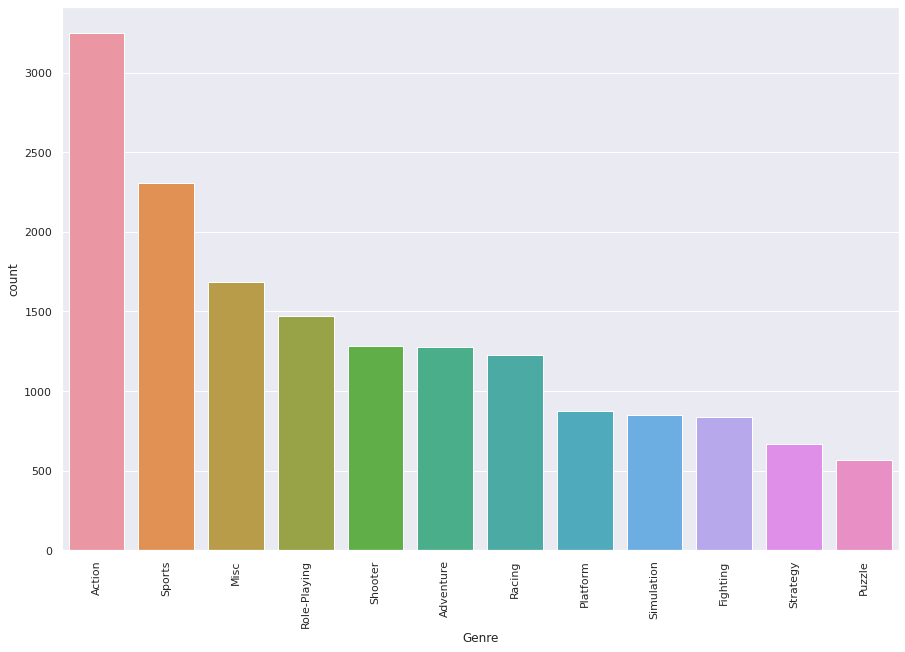

In [ ]:
#@title ¿Que genero de juegos han sido los mas creados?
t['Genre'].value_counts()
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=t, order = t['Genre'].value_counts().index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

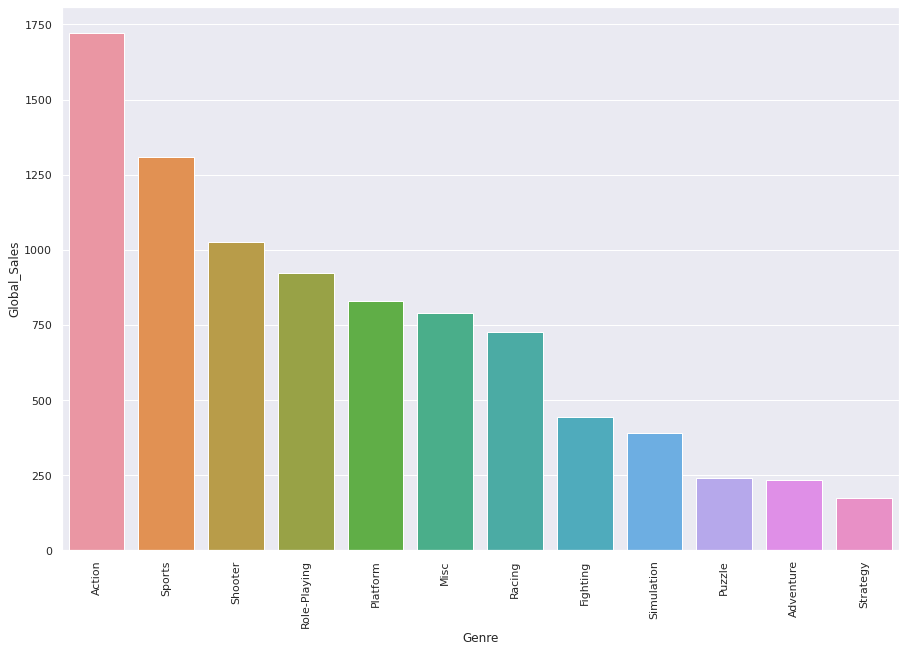

In [ ]:
#@title ¿Cuales generos de juegos tienen las mayores ventas globalmente?
t_genre = t.groupby(by=['Genre'])['Global_Sales'].sum()
t_genre = t_genre.reset_index()
t_genre = t_genre.sort_values(by=['Global_Sales'], ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=t_genre)
plt.xticks(rotation=90)

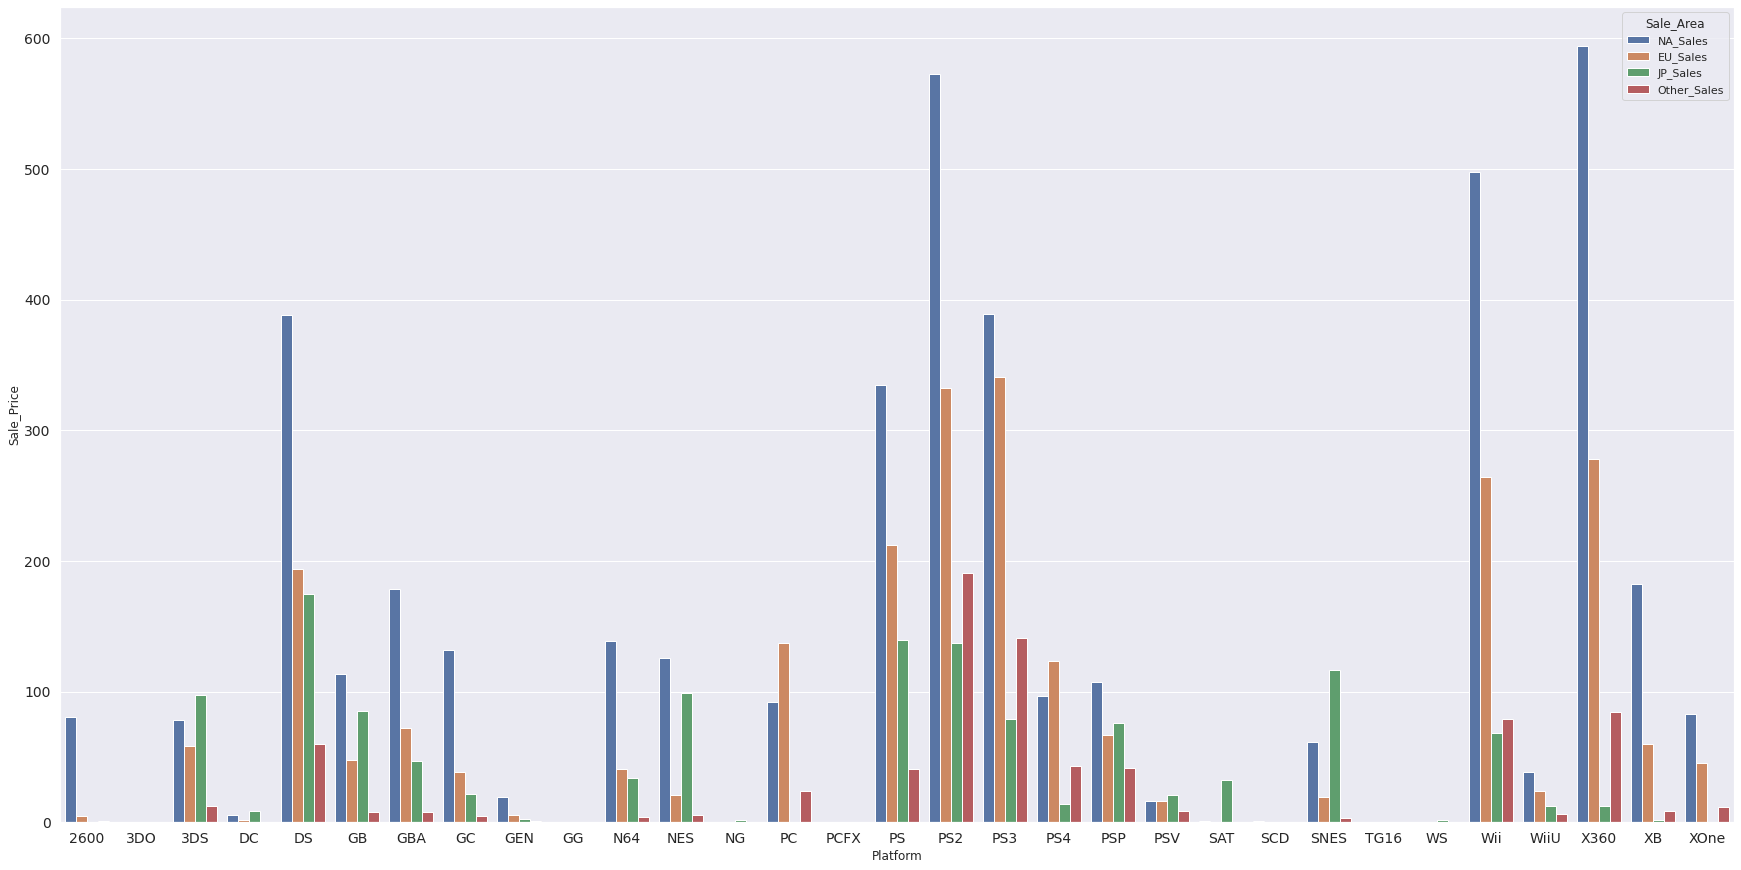

In [ ]:
#@title Comparacion de ventas por plataforma
comp_platform = t[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

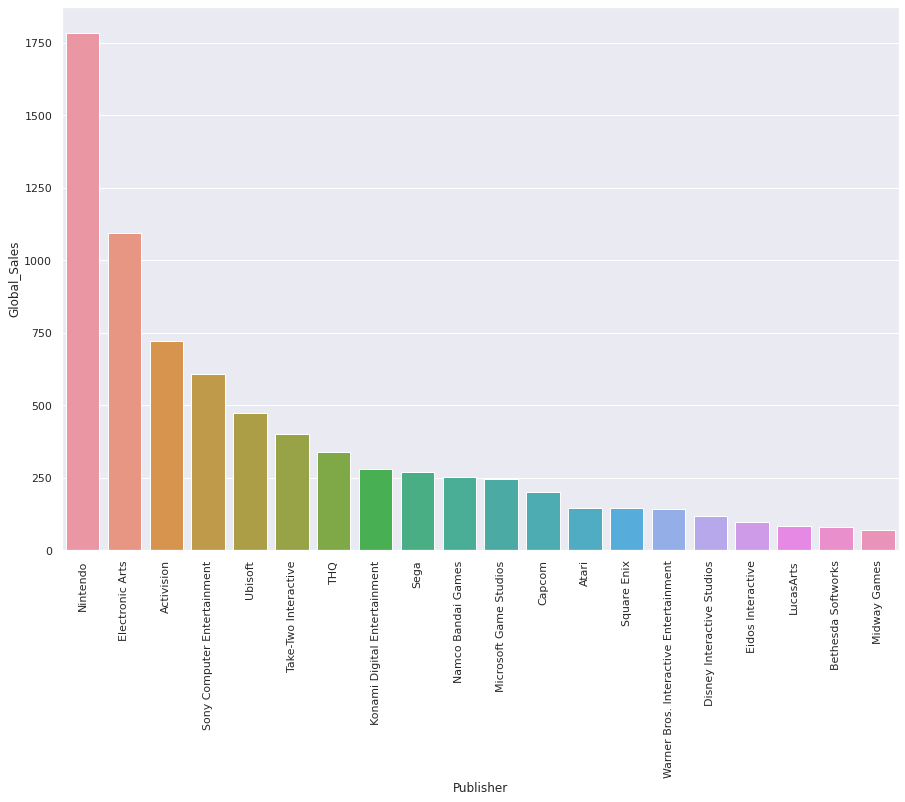

In [ ]:
#@title Top de ventas globales por publicador
sale_pbl = t[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90) 

In [ ]:
d = t
d.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
d = d.head(2000)

Name = d['Name'].values
class_names = np.array([a for i, a in enumerate(np.unique(Name)) ])
class_int_names = np.array([j for i in Name for j, k in enumerate(class_names) if i==k])
d['Name'] = class_int_names

Platform = d['Platform'].values
class_platform = np.array([a for i, a in enumerate(np.unique(Platform)) ])
class_int_platform = np.array([j for i in Platform for j, k in enumerate(class_platform) if i==k])
d['Platform'] = class_int_platform

Genre = d['Genre'].values
class_genre = np.array([a for i, a in enumerate(np.unique(Genre)) ])
class_int_genre = np.array([j for i in Genre for j, k in enumerate(class_genre) if i==k])
d['Genre'] = class_int_genre

Publisher = d['Publisher'].values
class_publisher = np.array([a for i, a in enumerate(np.unique(Publisher)) ])
class_int_publisher = np.array([j for i in Publisher for j, k in enumerate(class_publisher) if i==k])
d['Publisher'] = class_int_publisher

d.head(10)

<ipython-input-11-4bf324fa42d1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Name'] = class_int_names
<ipython-input-11-4bf324fa42d1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Platform'] = class_int_platform
<ipython-input-11-4bf324fa42d1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,1510,20,2006.0,10,57,41.49,29.02,3.77,8.46,82.74
1,2,1243,9,1985.0,4,57,29.08,3.58,6.81,0.77,40.24
2,3,694,20,2008.0,6,57,15.85,12.88,3.79,3.31,35.82
3,4,1511,20,2009.0,10,57,15.75,11.01,3.28,2.96,33.00
4,5,972,4,1996.0,7,57,11.27,8.89,10.22,1.00,31.37
5,6,1305,4,1989.0,5,57,23.20,2.26,4.22,0.58,30.26
6,7,899,3,2006.0,4,57,11.38,9.23,6.50,2.90,30.01
7,8,1509,20,2006.0,3,57,14.03,9.20,2.93,2.85,29.02
8,9,902,20,2009.0,4,57,14.59,7.06,4.70,2.26,28.62
9,10,317,9,1984.0,8,57,26.93,0.63,0.28,0.47,28.31


In [ ]:
class_publisher[57]

'Nintendo'

In [ ]:
d = d.drop(['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales'], axis=1)

In [ ]:
d['Global_Sales'] = d['Global_Sales'].apply(lambda x: x * 1000)
d['Global_Sales'] = d['Global_Sales'].astype(int)
d['Year'] = d['Year'].astype(int)

d.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,1510,20,2006,10,57,82740
1,2,1243,9,1985,4,57,40240
2,3,694,20,2008,6,57,35820
3,4,1511,20,2009,10,57,33000
4,5,972,4,1996,7,57,31370
5,6,1305,4,1989,5,57,30260
6,7,899,3,2006,4,57,30010
7,8,1509,20,2006,3,57,29020
8,9,902,20,2009,4,57,28620
9,10,317,9,1984,8,57,28310


In [ ]:
X = d.values[:,:-1]
y = d.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)
print(X.shape, y.shape)

(2000, 6) (2000,)


In [ ]:
est = GaussianNB()
est.fit(X_train,y_train)
print("%.3f"%accuracy_score(est.predict(X_test), y_test))

0.568


[0.014, 0.038, 0.08, 0.102, 0.118, 0.15, 0.19, 0.202, 0.228, 0.262, 0.28, 0.3, 0.32, 0.342, 0.368, 0.384, 0.402, 0.426, 0.454, 0.476, 0.496, 0.52, 0.548, 0.562, 0.58, 0.598, 0.61, 0.612, 0.614, 0.63, 0.63, 0.646, 0.664, 0.662, 0.668, 0.678, 0.672, 0.682, 0.674, 0.682, 0.686, 0.682, 0.696, 0.698, 0.684, 0.68, 0.692, 0.694, 0.692, 0.684, 0.69, 0.684, 0.684, 0.682, 0.682, 0.686, 0.692, 0.688, 0.676, 0.674, 0.686, 0.69, 0.684, 0.674, 0.692, 0.672, 0.69, 0.69, 0.682, 0.69, 0.69, 0.686, 0.676, 0.69, 0.684, 0.68, 0.69, 0.688, 0.694, 0.698, 0.672, 0.686, 0.676, 0.686, 0.69, 0.68, 0.686, 0.68, 0.68, 0.692, 0.692, 0.686, 0.678, 0.684, 0.702, 0.694, 0.692, 0.694, 0.68]


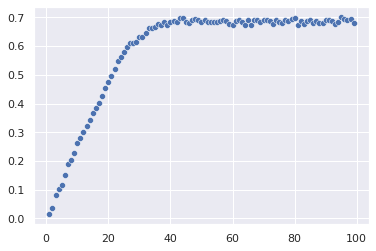

In [ ]:
accuracy_DTC=[]
for i in range(1,100):
  est = DecisionTreeClassifier(max_depth=i)
  est.fit(X_train,y_train)
  accuracy_DTC.append(accuracy_score(est.predict(X_test), y_test))
print(accuracy_DTC)

sns.scatterplot(x=range(1,100), y=accuracy_DTC)

Accuracy: 
[0.164, 0.172, 0.19, 0.202, 0.218, 0.214, 0.232, 0.228, 0.232, 0.222, 0.232, 0.24, 0.242, 0.23, 0.23, 0.226, 0.224, 0.224, 0.25, 0.218, 0.232, 0.232, 0.23, 0.222, 0.224, 0.218, 0.244, 0.224, 0.234, 0.206, 0.216, 0.242, 0.232, 0.246, 0.232, 0.228, 0.216, 0.224, 0.23, 0.232, 0.242, 0.21, 0.238, 0.234, 0.216, 0.216, 0.212, 0.228, 0.226, 0.236, 0.23, 0.228, 0.218, 0.226, 0.234, 0.238, 0.226, 0.23, 0.252, 0.22, 0.228, 0.248, 0.228, 0.242, 0.222, 0.244, 0.228, 0.232, 0.228, 0.21, 0.236, 0.226, 0.228, 0.236, 0.206, 0.238, 0.236, 0.212, 0.232, 0.238, 0.22, 0.226, 0.228, 0.22, 0.212, 0.228, 0.248, 0.236, 0.216, 0.216, 0.222, 0.23, 0.234, 0.208, 0.22]


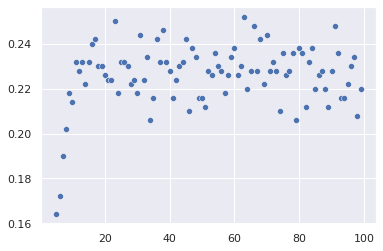

In [ ]:
accuracy_RFC=[]
for i in range(5,100):
  est = RandomForestClassifier(max_depth=i)
  est.fit(X_train,y_train)
  accuracy_RFC.append(accuracy_score(est.predict(X_test), y_test))
print("Accuracy: ")
print(accuracy_RFC)

sns.scatterplot(x=range(5,100), y=accuracy_RFC)

Accuracy: 
[0.148, 0.176, 0.15, 0.166, 0.166, 0.226, 0.202, 0.206, 0.18, 0.198, 0.22, 0.234, 0.196, 0.212, 0.198, 0.184, 0.208, 0.21, 0.23, 0.224, 0.194, 0.234, 0.216, 0.246, 0.216, 0.202, 0.222, 0.234, 0.204, 0.232, 0.22, 0.224, 0.22, 0.226, 0.216, 0.254, 0.214, 0.208, 0.206, 0.218, 0.228, 0.212, 0.216, 0.206, 0.216, 0.222, 0.218, 0.212, 0.248, 0.238, 0.224, 0.254, 0.27, 0.222, 0.234, 0.214, 0.236, 0.21, 0.236, 0.208, 0.258, 0.198, 0.222, 0.234, 0.218, 0.222, 0.228, 0.218, 0.236, 0.232, 0.23, 0.238, 0.222, 0.24, 0.218, 0.24, 0.218, 0.192, 0.22, 0.22, 0.216, 0.218, 0.23, 0.228, 0.24, 0.23, 0.236, 0.226, 0.212, 0.23, 0.25, 0.226, 0.248, 0.234, 0.232]


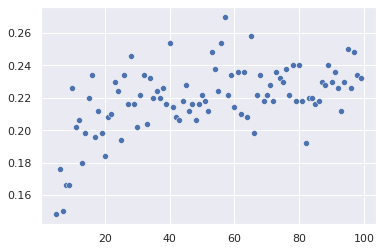

In [ ]:
accuracy_RFCE=[]
for i in range(5,100):
  est = RandomForestClassifier(n_estimators=i,max_depth=21)
  est.fit(X_train,y_train)
  accuracy_RFCE.append(accuracy_score(est.predict(X_test), y_test))
print("Accuracy: ")
print(accuracy_RFCE)

sns.scatterplot(x=range(5,100), y=accuracy_RFCE)

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    est = SVC(kernel=kernel)
    est.fit(X_train, y_train)
    y_pred = est.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print("La precisión del modelo con kernel", kernel, "es:", accuracy)

La precisión del modelo con kernel linear es: 0.488
La precisión del modelo con kernel poly es: 0.052
La precisión del modelo con kernel rbf es: 0.022
La precisión del modelo con kernel sigmoid es: 0.012


**Metodos de Regresion**


MSE depth split data :
[74065.64156099196, 49689.528748509794, 40337.30864152279, 39230.39347992423, 74038.4917192689, 40321.586018140595, 45832.888, 70014.848, 30924.888, 39101.65, 74591.288, 70483.692, 36779.046, 44502.328, 27710.328, 35986.05, 66590.446, 47759.01, 58829.446, 36264.608, 29175.294, 34039.646, 43771.888, 67582.328, 47667.25, 60669.048, 46258.646, 74674.888, 29324.692, 39769.09, 75462.65, 61944.928, 45046.646, 32955.65, 44931.888, 37705.688, 60007.41, 73227.85, 41163.008, 70724.646, 48277.25, 72013.608, 34529.29, 29630.05, 37165.646, 62376.29, 35739.29, 36749.008, 61584.45, 65048.29, 74771.446, 31756.088, 32747.248, 71060.292, 45087.808, 37545.728, 68863.048, 37995.65, 58952.446, 75100.45, 69369.132, 33485.446, 73195.45, 67238.29, 38319.488, 32157.808, 67403.646, 42179.046, 70511.448, 58917.608, 42272.494, 45598.45, 44523.646, 61505.048, 32258.208, 37020.65, 67105.088, 41502.646, 76428.652, 38567.608, 57696.25, 72844.448, 40929.888, 73776.928, 67126.69, 70499.452, 70814

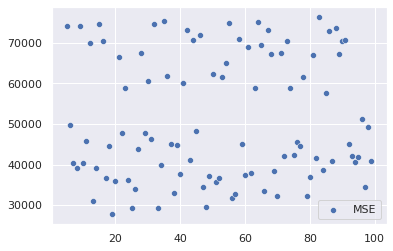

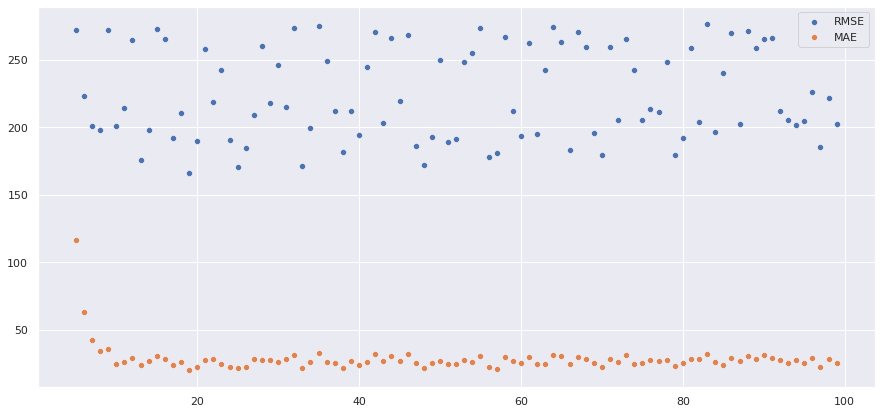

In [ ]:
MSE_DTR=[]
RMSE_DTR=[]
MAE_DTR=[]
for i in range(5,100):
  regressor = DecisionTreeRegressor(max_depth=i)
  regressor.fit(X_train,y_train)

  MSE_DTR.append(mean_squared_error(y_test, regressor.predict(X_test)))
  RMSE_DTR.append(np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
  MAE_DTR.append(mean_absolute_error(y_test, regressor.predict(X_test)))

print("MSE depth split data :")
print(MSE_DTR)
print("RMSE depth split data :")
print(RMSE_DTR)
print("MAE depth split data : ")
print(MAE_DTR)

sns.scatterplot(x=range(5,100), y=MSE_DTR, label="MSE")
fig, ax = plt.subplots(figsize=(15,7))
sns.scatterplot(x=range(5,100), y=RMSE_DTR,  ax=ax, label="RMSE")
sns.scatterplot(x=range(5,100), y=MAE_DTR, ax=ax, label="MAE")
ax.legend()
plt.show()

MSE depth split data :
[29470.292967991092, 22487.431938096914, 33746.69961876239, 26818.01748594218, 28449.665953223688, 19985.697469347222, 17447.661439685784, 14754.12278740002, 16994.03689719999, 17983.98151099999, 26214.174589999988, 19788.720463799997, 13347.617834199988, 19733.52841260002, 23834.75899520001, 21099.40024179999, 22769.07692339998, 23305.32473039998, 16242.485193199993, 20052.381306200008, 17926.301853000008, 29694.086898999994, 24254.504692200007, 31938.365919599975, 22936.672679799976, 20506.469140999987, 23943.217534599997, 18188.952847599987, 22832.71512559999, 29993.989297999997, 22731.410748000017, 26969.27573240002, 26427.406567399994, 20173.48807539998, 19204.76152300001, 20289.254545000007, 35106.87476139999, 25887.905792800007, 16160.08747020001, 21463.892524799994, 22801.88426239999, 19837.615852600014, 20418.10909259998, 24306.237213400018, 19427.555143200003, 33740.45344400001, 35146.9403774, 27539.57052139999, 24734.947398399992, 20706.351764800023, 2

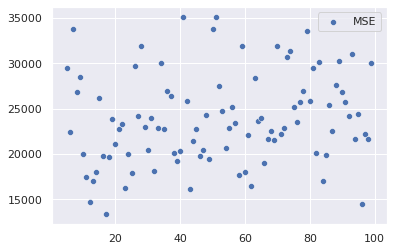

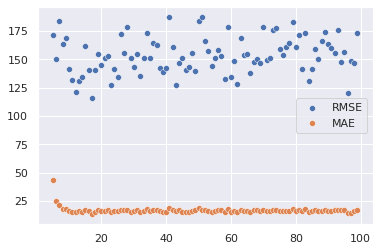

In [ ]:
MSE_RFR=[]
RMSE_RFR=[]
MAE_RFR=[]
for i in range(5,100):
  regressor = RandomForestRegressor(max_depth=i)
  regressor.fit(X_train,y_train)

  MSE_RFR.append(mean_squared_error(y_test, regressor.predict(X_test)))
  RMSE_RFR.append(np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
  MAE_RFR.append(mean_absolute_error(y_test, regressor.predict(X_test)))

print("MSE depth split data :")
print(MSE_RFR)
print("RMSE depth split data :")
print(RMSE_RFR)
print("MAE depth split data : ")
print(MAE_RFR)

sns.scatterplot(x=range(5,100), y=MSE_RFR, label="MSE")
fig, ax = plt.subplots()
sns.scatterplot(x=range(5,100), y=RMSE_RFR,  ax=ax, label="RMSE")
sns.scatterplot(x=range(5,100), y=MAE_RFR, ax=ax, label="MAE")
ax.legend()
plt.show()

MSE depth split data :
[4102.763040000002, 30112.020333333334, 28283.513387755105, 23565.96984375, 18122.137185185195, 26326.11958, 23123.98907438018, 33052.334833333334, 67724.57031952664, 16260.307836734708, 53599.49555555553, 26933.9196484375, 16154.72883044982, 103594.09980246914, 33716.8138060942, 21026.23318, 25701.724489795888, 82401.81266115703, 45645.739311909245, 25640.460003472224, 14962.543827200006, 21511.875710059157, 19325.95875171469, 27578.491431122446, 15742.472242568383, 16417.063740000016, 13592.176828303858, 12562.80896875, 29226.000751147858, 52175.11433910032, 27026.72952979594, 14635.417489197525, 23948.15056829803, 50264.57451108034, 22248.20320973046, 17823.482706249997, 31001.664462819757, 24758.658495464846, 24947.021930773408, 18104.474869834703, 26130.619413333345, 37810.4316672968, 30862.191414214554, 18503.14865972221, 15717.969516034973, 33624.87704079997, 21271.778447520166, 32657.45453032546, 27611.274057671777, 56524.28282167352, 17452.66494214875, 2

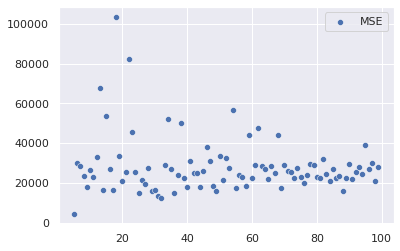

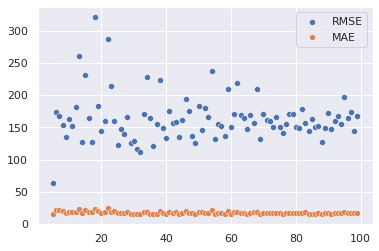

In [ ]:
MSE_RFRE=[]
RMSE_RFRE=[]
MAE_RFRE=[]
for i in range(5,100):
  regressor = RandomForestRegressor(n_estimators=i,max_depth=21)
  regressor.fit(X_train,y_train)

  mse_rf = mean_squared_error(y_test, regressor.predict(X_test))
  MSE_RFRE.append(mean_squared_error(y_test, regressor.predict(X_test)))
  RMSE_RFRE.append(np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
  MAE_RFRE.append(mean_absolute_error(y_test, regressor.predict(X_test)))

print("MSE depth split data :")
print(MSE_RFRE)
print("RMSE depth split data :")
print(RMSE_RFRE)
print("MAE depth split data : ")
print(MAE_RFRE)

sns.scatterplot(x=range(5,100), y=MSE_RFRE, label="MSE")
fig, ax = plt.subplots()
sns.scatterplot(x=range(5,100), y=RMSE_RFRE,  ax=ax, label="RMSE")
sns.scatterplot(x=range(5,100), y=MAE_RFRE, ax=ax, label="MAE")
ax.legend()
plt.show()

In [ ]:
Name = "Goku Sayan" #@param {type:"string"}
Platform = "Wii" #@param {type:"string"}
Year = "2006" #@param {type:"string"}
Genre = "Action" #@param {type:"string"}
Publisher = "Nintendo" #@param {type:"string"}
Rank = "1"

In [ ]:
position_name = np.argmax(class_names == Name)
if position_name.size > 0:
    Namet = position_name
    print("El nombre es el numero", position_name)
else:
    class_names = np.append(class_names, Name)
    Namet = len(class_names)
    print("El nombre fue agregado con el numero", Namet)

position_platform = np.argmax(class_platform == Platform)
if position_platform.size > 0:
    Platformt = position_platform
    print("La plataforma es el numero", position_platform)
else:
    class_platform = np.append(class_platform, Platform)
    Platformt = len(class_platform)
    print("La plataforma fue agregada con el numero", Platformt)

position_genre = np.argmax(class_genre == Genre)
if position_genre.size > 0:
    Genret = position_genre
    print("El genero es el numero", position_genre)
else:
    class_genre = np.append(class_genre, Genre)
    Genret = len(class_genre)
    print("El genero fue agregado con el numero", Genret)

position_publisher = np.argmax(class_publisher == Publisher)
if position_publisher.size > 0:
    Publishert = position_publisher
    print("El desarrollador es el numero", position_publisher)
else:
    class_publisher = np.append(class_publisher, Publisher)
    Publishert = len(class_publisher)
    print("El desarrollador fue agregado con el numero", Publishert)

Game_test = [Rank,Namet, Platformt, Year, Genret, Publishert]
Game_test

El nombre es el numero 0
La plataforma es el numero 20
El genero es el numero 0
El desarrollador es el numero 57


['1', 0, 20, '2006', 0, 57]

In [ ]:
Game_test = pd.DataFrame(Game_test)
Game_test = Game_test.transpose()

prediction={}

estG = GaussianNB()
estG.fit(X_train,y_train)
predG = estG.predict(Game_test)
prediction['GaussianNB'] = predG

est = DecisionTreeClassifier(max_depth=25)
est.fit(X_train,y_train)
predDC = est.predict(Game_test)
prediction['DecisionTreeClassifier'] = predDC

est = RandomForestClassifier(n_estimators=20 , max_depth=19)
est.fit(X_train,y_train)
predRC = est.predict(Game_test)
prediction['RandomForestClassifier'] = predRC

est = SVC(kernel='linear')
est.fit(X_train, y_train)
predSVC = est.predict(Game_test)

est = DecisionTreeRegressor(max_depth=21)
est.fit(X_train,y_train)
predDC = est.predict(Game_test)
prediction['DecisionTreeRegressor'] = predDC

est = RandomForestRegressor(n_estimators=21 , max_depth=20)
est.fit(X_train,y_train)
predRC = est.predict(Game_test)
prediction['RandomForestRegressor'] = predRC


prediction

{'GaussianNB': array([14640]),
 'DecisionTreeClassifier': array([2790]),
 'RandomForestClassifier': array([1490]),
 'DecisionTreeRegressor': array([82740.]),
 'RandomForestRegressor': array([56770.47619048])}